# 梯度下降实例

## 问题描述

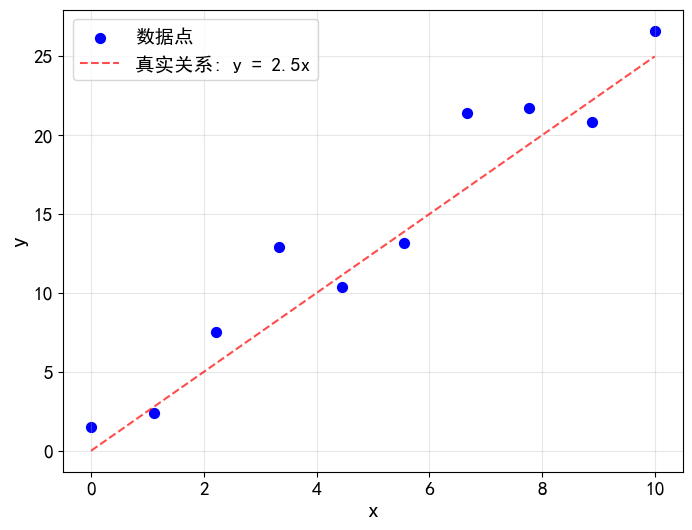

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子以便结果可重现
np.random.seed(42)

# 生成10个数据点
k_true = 2.5  # 真实的正比例系数
num_points = 10

# 生成x值 (0到10之间均匀分布)
x = np.linspace(0, 10, num_points)

# 生成y值: y = k*x + 噪声
noise = np.random.normal(0, 3, num_points)  # 均值为0，标准差为1的噪声
y = k_true * x + noise

# 可视化数据点
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='数据点', s=50)
plt.plot(x, k_true * x, 'r--', label=f'真实关系: y = {k_true}x', alpha=0.7)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
# 去掉标题
# plt.title('正比例关系数据点')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('../../media/img/chpt2_gd_data_points.png', dpi=200)
plt.show()

# 可选：将数据保存到文件
data = np.column_stack((x, y))

展示误差函数.

k=2.8, MSE=5.2890


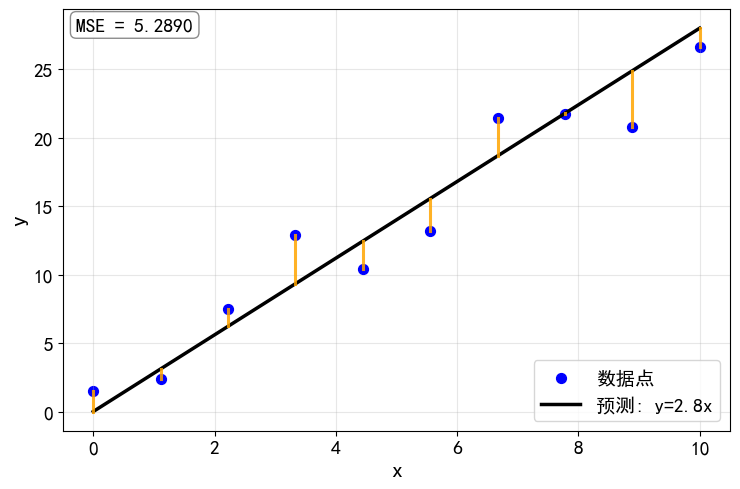

In [ ]:
# 针对 data 使用固定 k=2.8，展示误差（仅显示 MSE；预测线为黑色，误差线加粗；更大字体，无标题）
x_data = data[:, 0]
y_data = data[:, 1]

k_fixed = 2.8
y_hat = k_fixed * x_data
residuals = y_hat - y_data

mse = np.mean(residuals ** 2)
print(f"k={k_fixed}, MSE={mse:.4f}")

fig, ax = plt.subplots(figsize=(7.5, 5))
ax.scatter(x_data, y_data, color='blue', s=50, label='数据点')
ax.plot(x_data, y_hat, color='black', linewidth=2.5, label=f'预测: y={k_fixed}x')

for xi, yi, yh in zip(x_data, y_data, y_hat):
    ax.plot([xi, xi], [yi, yh], color='orange', alpha=0.85, linewidth=2.2)

# 在图内仅显示 MSE
ax.text(0.02, 0.98, f"MSE = {mse:.4f}", transform=ax.transAxes,
        fontsize=14, va='top', ha='left', bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.9))

ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
# 去掉标题
# ax.set_title('k=2.8 下的误差展示（橙色为残差）')
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../media/img/chpt2_gd_k2p8_error.png', dpi=200)
plt.show()

动态展示误差函数.

In [34]:
# 备用交互方案：使用 ipywidgets 在非交互后端下动态更新 k
from ipywidgets import interact, FloatSlider

def _plot_with_k(k):
    y_hat = k * x
    residuals = y_hat - y
    mse = float(np.mean(residuals ** 2))
    plt.figure(figsize=(7.5, 5))
    plt.scatter(x, y, color='blue', s=50, label='数据点')
    plt.plot(x, y_hat, color='black', linewidth=2.5, label=f'预测: y={k:.2f}x')
    for xi, yi, yh in zip(x, y, y_hat):
        plt.plot([xi, xi], [yi, yh], color='orange', alpha=0.85, linewidth=2.2)
    plt.text(0.02, 0.98, f"MSE = {mse:.4f}", transform=plt.gca().transAxes,
             fontsize=12, va='top', ha='left', bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.9))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('动态 k 误差（ipywidgets）')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

interact(_plot_with_k, k=FloatSlider(min=0.0, max=4.0, step=0.01, value=2.8))

interactive(children=(FloatSlider(value=2.8, description='k', max=4.0, step=0.01), Output()), _dom_classes=('w…

<function __main__._plot_with_k(k)>

梯度下降法的结果(learning rate = 0.01), 收敛.

估计的k: 2.6856 (真实k: 2.5000)


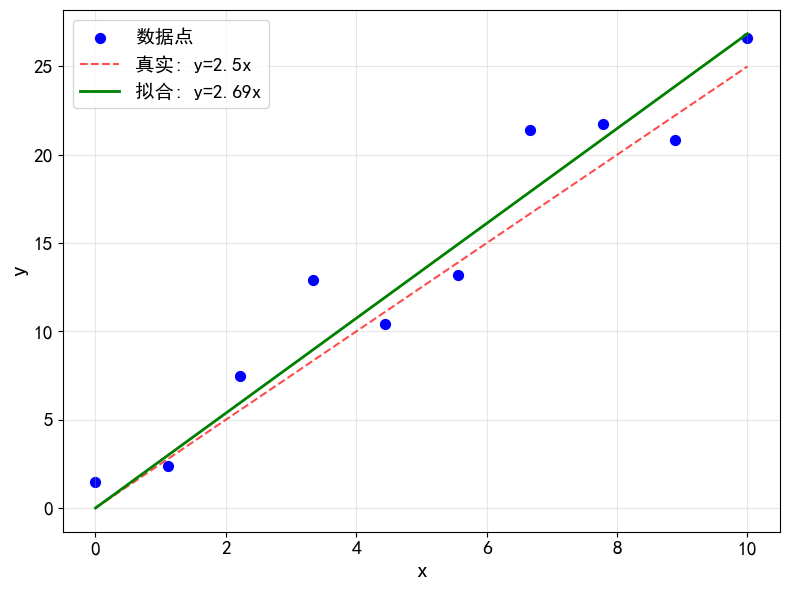

In [ ]:
k = 0.0
lr = 0.01
epochs = 2000
n = x.shape[0]
loss_hist = []
for _ in range(epochs):
    y_pred = k * x
    err = y_pred - y
    grad = (2.0 / n) * np.sum(err * x)
    k -= lr * grad
    loss = (1.0 / n) * np.sum(err**2)
    loss_hist.append(loss)
print(f"估计的k: {k:.4f} (真实k: {k_true:.4f})")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, y, s=50, color='blue', label='数据点')
ax.plot(x, k_true * x, 'r--', alpha=0.7, label=f'真实: y={k_true}x')
ax.plot(x, k * x, 'g-', linewidth=2, label=f'拟合: y={k:.2f}x')
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
# 去掉标题
# ax.set_title('拟合结果')
ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()
fig.savefig('../../media/img/chpt2_gd_fit.png', dpi=200)
plt.show()

梯度下降法的结果(learning rate = 0.05), 发散!

C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_34308\957126112.py:13: RuntimeWarning: overflow encountered in square
  loss = (1.0 / n) * np.sum(err**2)
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_34308\957126112.py:8: RuntimeWarning: invalid value encountered in multiply
  y_pred = k * x


估计的k: nan (真实k: 2.5000)


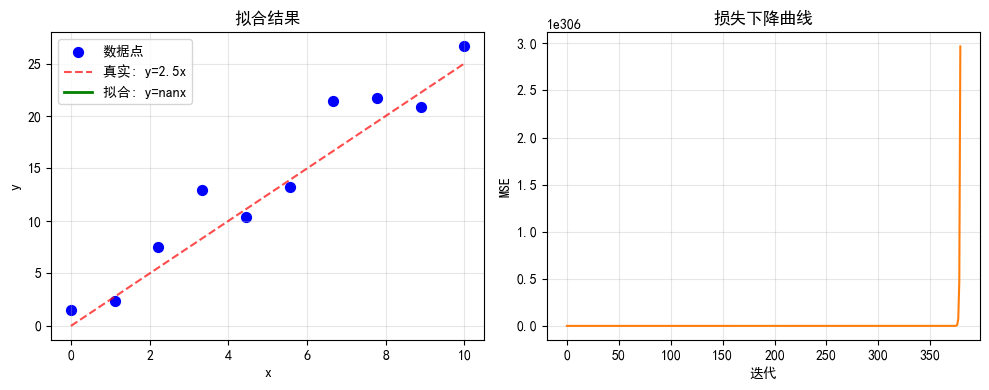

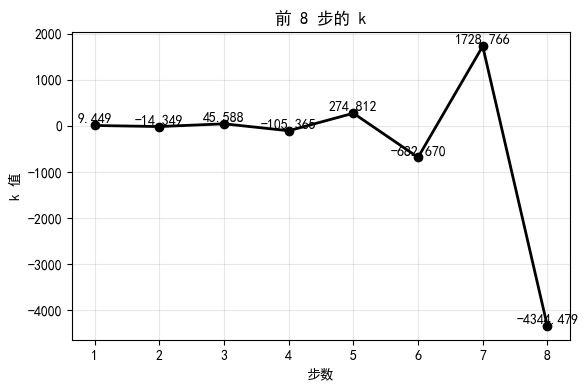

In [36]:
k = 0.0
lr = .05
epochs = 2000
n = x.shape[0]
loss_hist = []
k_hist = []
for _ in range(epochs):
    y_pred = k * x
    err = y_pred - y
    grad = (2.0 / n) * np.sum(err * x)
    k -= lr * grad
    k_hist.append(k)
    loss = (1.0 / n) * np.sum(err**2)
    loss_hist.append(loss)
print(f"估计的k: {k:.4f} (真实k: {k_true:.4f})")
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(x, y, s=50, color='blue', label='数据点')
ax[0].plot(x, k_true * x, 'r--', alpha=0.7, label=f'真实: y={k_true}x')
ax[0].plot(x, k * x, 'g-', linewidth=2, label=f'拟合: y={k:.2f}x')
ax[0].legend()
ax[0].grid(True, alpha=0.3)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('拟合结果')
ax[1].plot(loss_hist, color='#ff7f0e')
ax[1].set_xlabel('迭代')
ax[1].set_ylabel('MSE')
ax[1].set_title('损失下降曲线')
ax[1].grid(True, alpha=0.3)
plt.tight_layout()
steps = min(8, len(k_hist))
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4))
ax2.plot(range(1, steps+1), k_hist[:steps], marker='o', color='black', linewidth=2)
for i, kv in enumerate(k_hist[:steps], start=1):
    ax2.text(i, kv, f"{kv:.3f}", va='bottom', ha='center', fontsize=10)
ax2.set_xlabel('步数')
ax2.set_ylabel('k 值')
ax2.set_title('前 8 步的 k')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()